In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Excel file
excel_data = pd.ExcelFile("DS_task.xlsx")
#print(excel_data.sheet_names)
# Load data
df = excel_data.parse(sheet_name="STR_sample_data")  
#print(df.head())

In [3]:
# Step 1: Check for missing values
#print("Missing values per column:\n", df.isnull().sum())
# Step 2: Data Cleaning
# Drop rows with missing values and coloumn customer_site_id (customer Id is not needed for now)
dfc = df.drop(columns=['customer_site_id']).dropna()
#dfc.drop(columns=['customer_site_id'])
#categorical_cols = dfc.select_dtypes(include=['object']).columns
#print(categorical_cols)
# Display the cleaned dataset and check for remaining missing values
#print("Cleaned Data:\n", dfc.head())
#print("Missing values after cleaning:\n", dfc.isnull().sum())

In [4]:
dfc.describe()

,orders_1yr,line_items_1yr,days_since_last_purchase_1yr,prop_reduced_items_1yr,promo_customer_blc_1yr,promo_customer_freedelivery_1yr,Brand_Nike_prop_revenue_1yr,Brand_Adidas_prop_revenue_1yr,Device_mobile_prop_revenue_1yr,Device_iosapp_prop_revenue_1yr,Delivery_NextDay_prop_revenue_1yr,Payment_bnpl_prop_revenue_1yr,amount_paid_per_order_1yr,repurchased
count,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000,100992.000000
mean,1.971968,3.642269,164.282151,0.296889,0.136070,0.475751,0.372074,0.170534,0.599199,0.185456,0.077364,0.204011,134.923302,0.152953
std,2.726879,6.452666,105.741296,0.388766,0.342865,0.499414,0.419269,0.325964,0.467252,0.372313,0.241728,0.385861,104.386019,0.359944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.914115,0.000000
50%,1.000000,2.000000,170.000000,0.000000,0.000000,0.000000,0.154086,0.000000,1.000000,0.000000,0.000000,0.000000,113.280000,0.000000
75%,2.000000,4.000000,246.000000,0.521739,0.000000,1.000000,0.839707,0.162562,1.000000,0.000000,0.000000,0.000000,171.690000,0.000000
max,286.000000,781.000000,369.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2985.990000,1.000000


<class 'pandas.core.indexes.base.Index'>


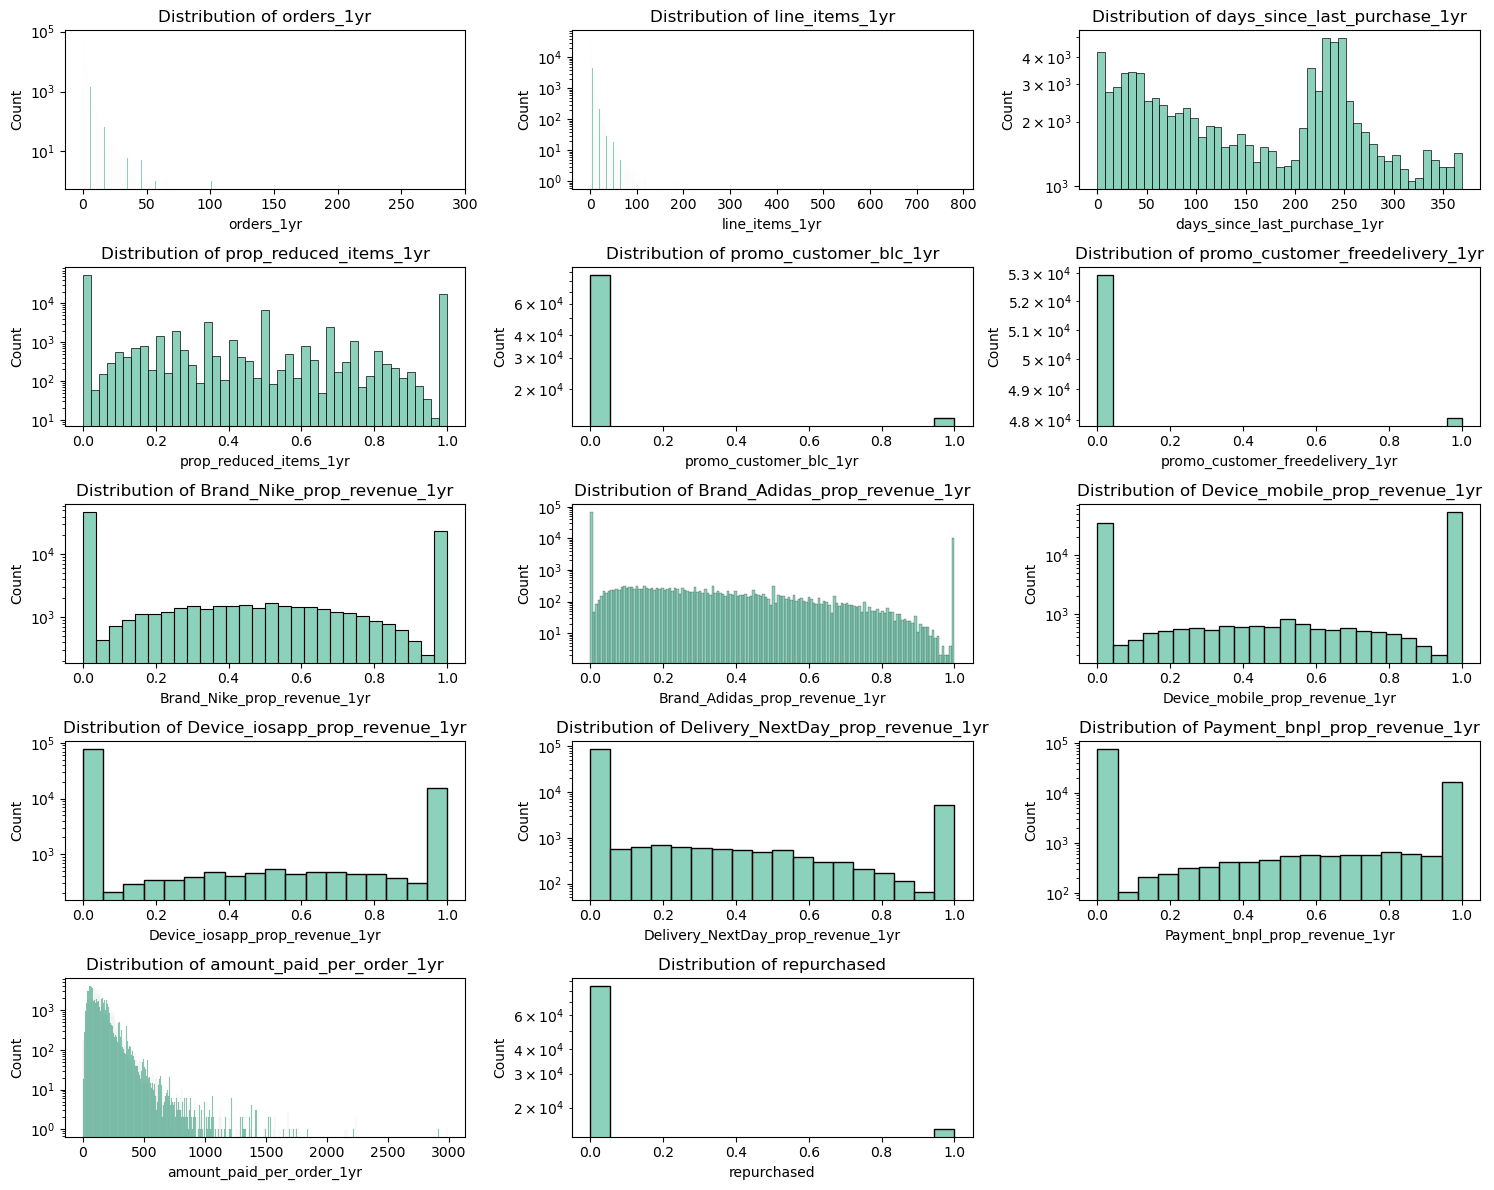

In [5]:
sns.set_palette("Set2") 

# Step 4: Initial Plots for Each Variable
# Create histograms for all numeric variables
#numeric_cols = dfc.select_dtypes(include=['float64', 'int64']).columns
#numeric_cols = dfc.select_dtypes(include=[np.number])
#print(len(numeric_cols))
#print("Checking for infinite values:\n")
#print(np.isinf(numeric_cols))
#print("\nColumns with inf values:\n")
#print(np.isinf(numeric_cols).any())
#print(np.isinf(numeric_cols).sum())

numeric_cols = dfc.select_dtypes(include=['float64', 'int64']).columns
print(type(numeric_cols))

#numeric_cols.replace([np.inf, -np.inf], np.nan,inplace=True)
#print("\nDataFrame after replacing inf with NaN:\n", dfc)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    ax = sns.histplot(dfc[col], kde=False)
    plt.title(f'Distribution of {col}')
    # Set the y-axis to logarithmic scale
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

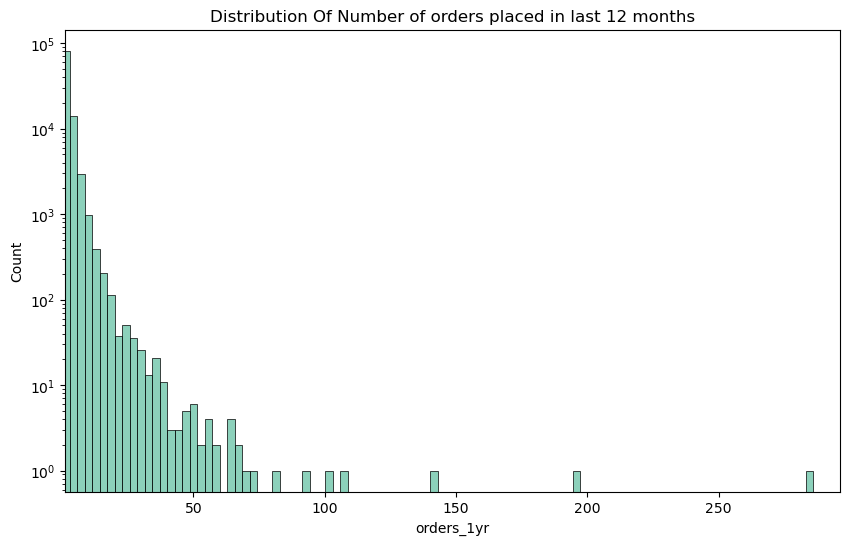

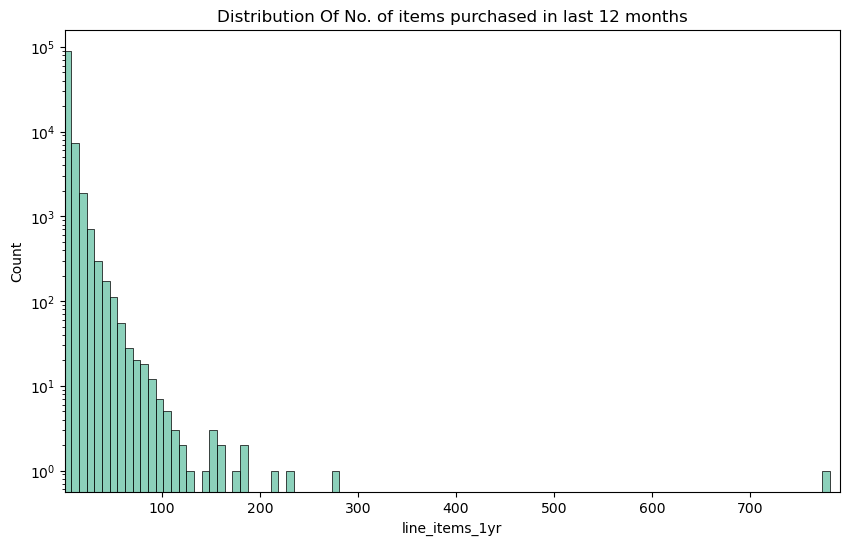

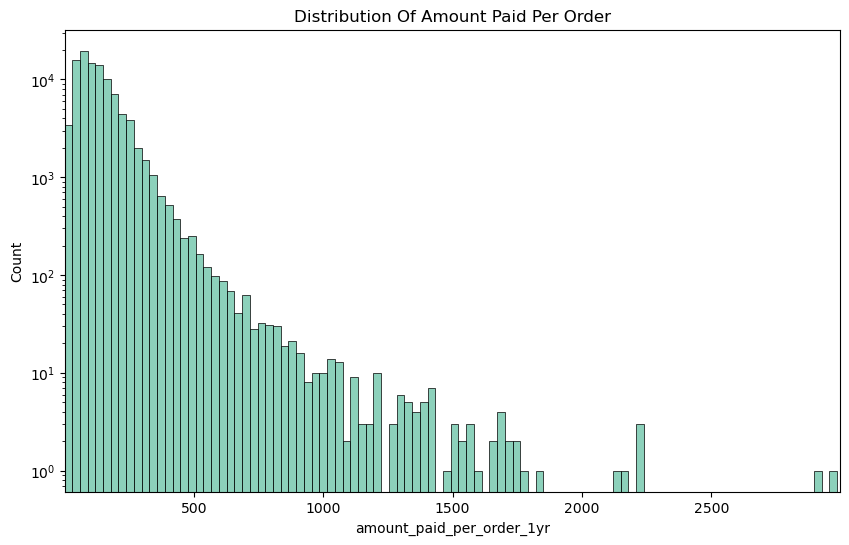

In [6]:

#mean = dfc['orders_1yr'].mean()
#std_dev = dfc['orders_1yr'].std()
#lower_bound = mean - 3 * std_dev
#upper_bound = mean + 3 * std_dev

#print(f"Mean: {mean}, Standard Deviation: {std_dev}")
#print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Plot zoomed-in distribution focusing on outliers (outside of 2 standard deviations)
plt.figure(figsize=(10, 6))
ax = sns.histplot(dfc['orders_1yr'], bins=100, kde=False)
ax.set_xlim(1, dfc['orders_1yr'].max()+10)
#ax.set_xlim(upper_bound, dfc['orders_1yr'].max())  # Zoom into the outlier range
ax.set_yscale('log')
#ax.set_xscale('log')
plt.title('Distribution Of Number of orders placed in last 12 months')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.histplot(dfc['line_items_1yr'], bins=100, kde=False)
ax.set_xlim(1, dfc['line_items_1yr'].max()+10)
ax.set_yscale('log')
plt.title('Distribution Of No. of items purchased in last 12 months')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.histplot(dfc['amount_paid_per_order_1yr'], bins=100, kde=False)
ax.set_xlim(1, dfc['amount_paid_per_order_1yr'].max()+10)
ax.set_yscale('log')
plt.title('Distribution Of Amount Paid Per Order')
plt.show()



# Here are the key visualizations:

- #### Distribution of Orders in the Last Year:
    The majority of customers placed 1 to 2 orders, but there are some outliers with significantly higher orders.

- #### Distribution of number of items in last 12 months (probably per order):
    Most customers bought 1/2 items per order, with a few outliers with significant high number of items in the order.

- #### Distribution of Amount Paid per Order:
    Most customers paid between 50 - 200 dollars per order, with a few outliers spending significantly more.



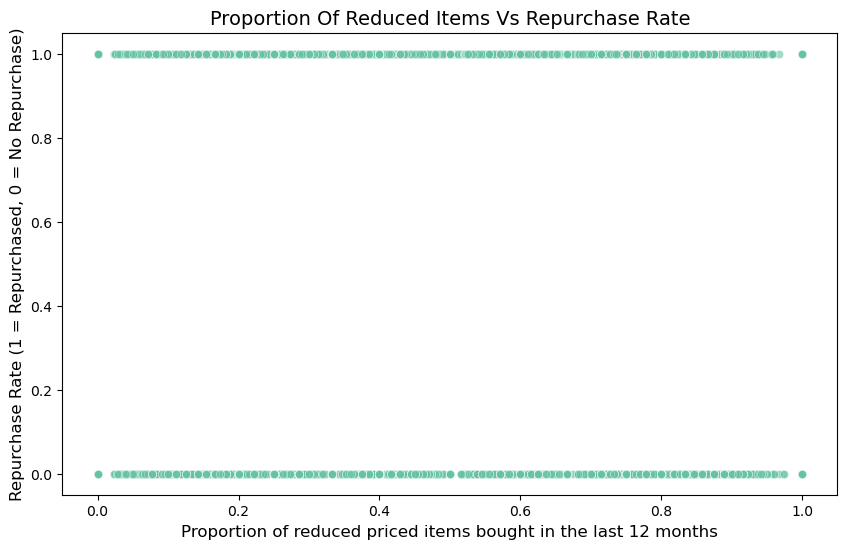

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prop_reduced_items_1yr', y='repurchased', data=df, alpha=0.6)
plt.title('Proportion Of Reduced Items Vs Repurchase Rate', fontsize=14)
plt.xlabel('Proportion of reduced priced items bought in the last 12 months', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()


In [8]:
# Create bar plots for categorical variables 
#categorical_cols = dfc.select_dtypes(include=['object']).columns
#print(categorical_cols)

#plt.figure(figsize=(10, 6))
#for i, col in enumerate(categorical_cols, 1):
#    plt.subplot(len(categorical_cols)//3 + 1, 3, i)
#    ax = sns.countplot(y=col, data=dfc)
#    ax.set_xscale('log')
#    plt.title(f'Distribution of {col}')
#plt.tight_layout()
#plt.show()


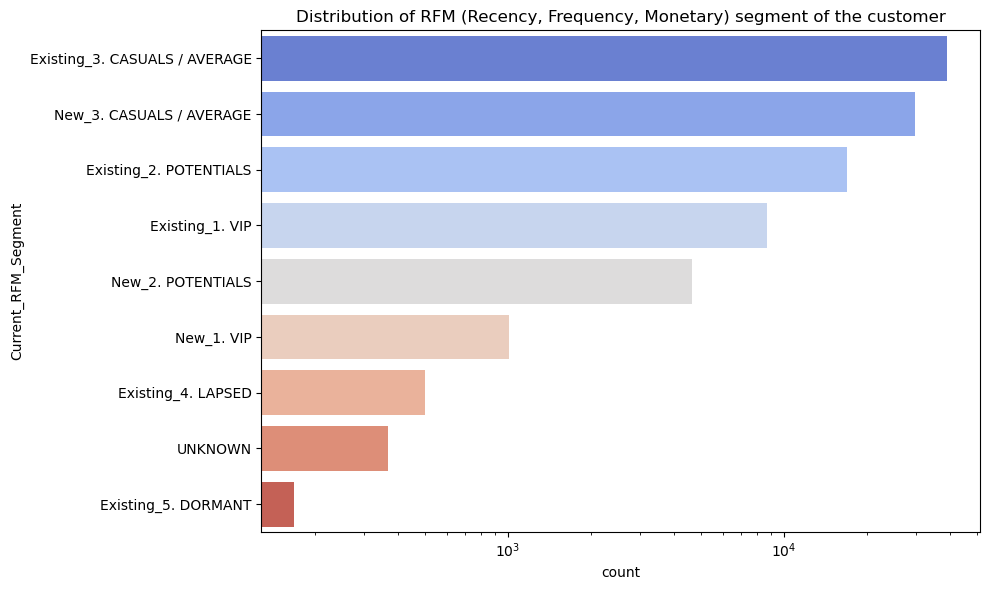

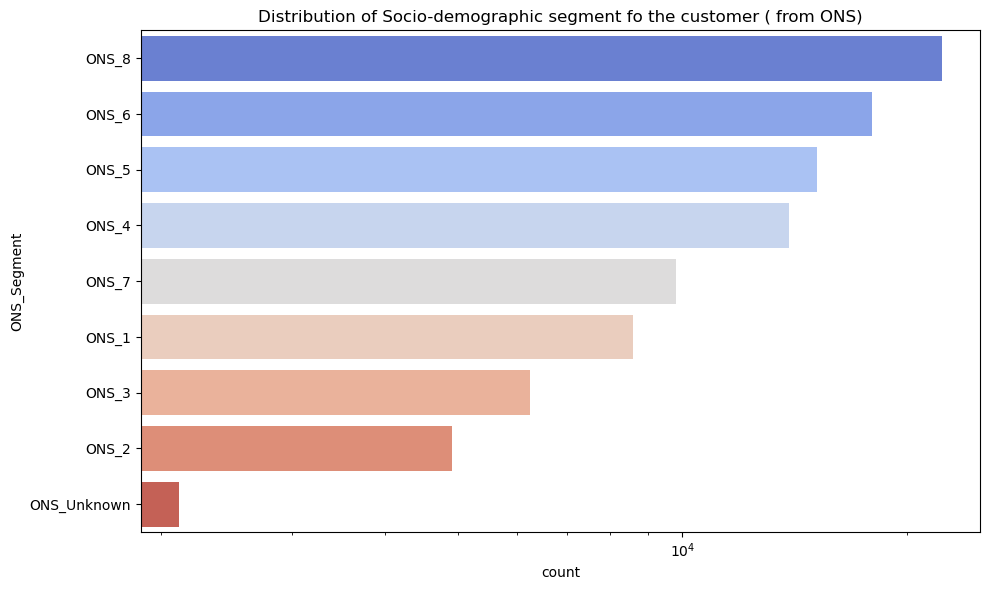

In [9]:
plt.figure(figsize=(10, 6))
category_order = dfc['Current_RFM_Segment'].value_counts().index
ax = sns.countplot(y='Current_RFM_Segment', data=dfc, order=category_order, palette='coolwarm')
ax.set_xscale('log')
plt.title(f'Distribution of RFM (Recency, Frequency, Monetary) segment of the customer')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
category_order = dfc['ONS_Segment'].value_counts().index
ax = sns.countplot(y='ONS_Segment', data=dfc, order=category_order, palette='coolwarm')
ax.set_xscale('log')
plt.title(f'Distribution of Socio-demographic segment fo the customer ( from ONS)')
plt.tight_layout()
plt.show()


# Insights from categorical variables:
- #### Current RFM Segment:
    Certain RFM segments, such as "Casuals"/"POTENTIALS"/ "VIPs" have higher frequency compared to others while there are customers belonging to Lapsed/Unknown/Dormant category but their statistics is limited.
- #### ONS Segment : 
    Certain ONS segments with higher engagement (e.g., "ONS_8"/"ONS_6") have higher frequency compared to others while here also we have customers belonging to Unknown category.
    

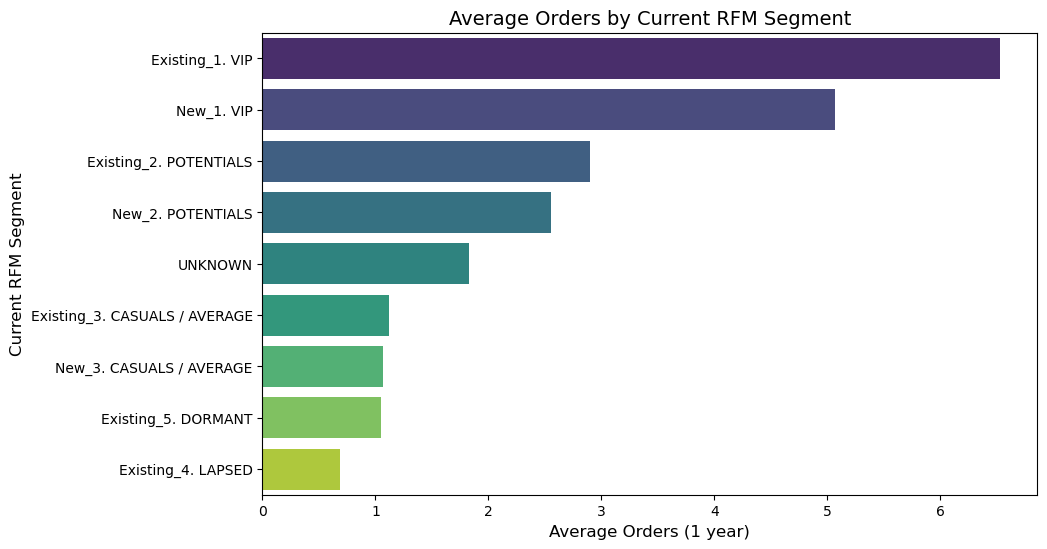

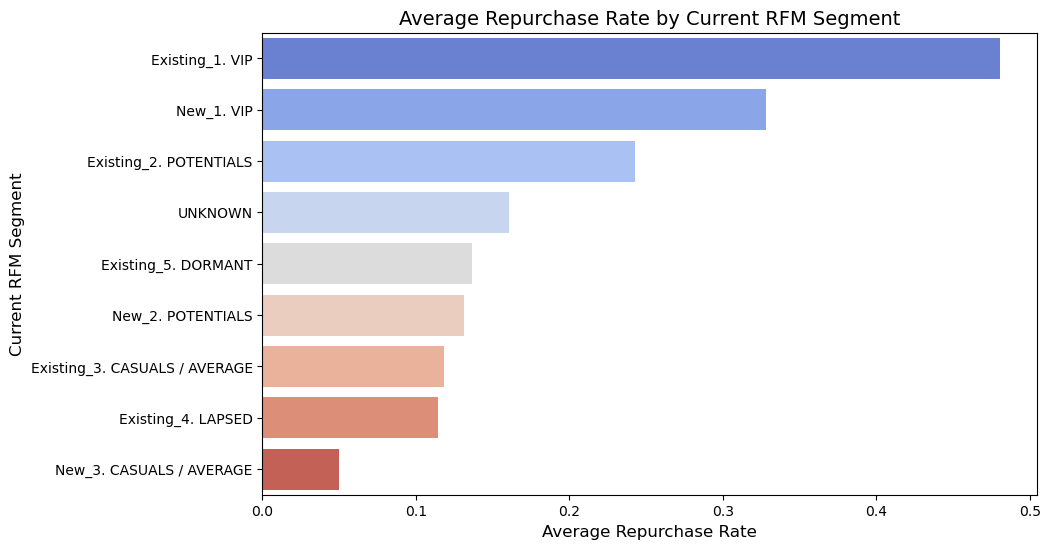

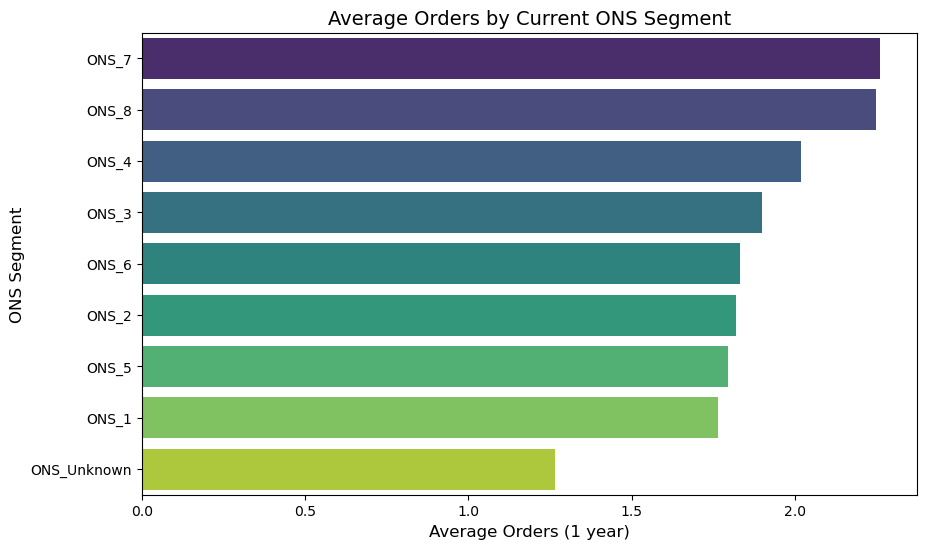

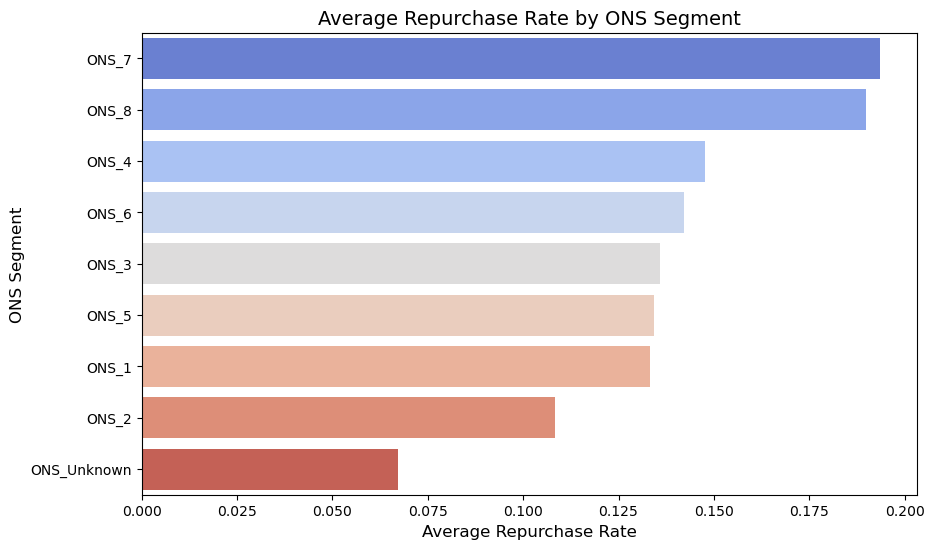

In [10]:
#### Now first, I want to analyze the customer behavior based on Current_RFM_Segment and 
#### ONS_Segment categories, focusing on their impact on order frequency and repurchase rates.


#### Average Orders By Current RFM Segment
# Step 1: Group by 'Current_RFM_Segment' and calculate the average number of orders
rfm_avg_orders = dfc.groupby('Current_RFM_Segment')['orders_1yr'].mean().reset_index()
# Step 2: Sort the segments by average orders for better visualization
rfm_avg_orders = rfm_avg_orders.sort_values(by='orders_1yr', ascending=False)
# Step 3: Plot the average orders by Current RFM Segment using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='orders_1yr', y='Current_RFM_Segment', data=rfm_avg_orders, palette='viridis')
# Step 4: Add labels and title
plt.title('Average Orders by Current RFM Segment', fontsize=14)
plt.xlabel('Average Orders (1 year)', fontsize=12)
plt.ylabel('Current RFM Segment', fontsize=12)
plt.show()

#### Average Repurchase Rate By Current RFM Segment
# Step 1: Group by 'Current_RFM_Segment' and calculate the average repurchase rate
rfm_avg_repurchase = df.groupby('Current_RFM_Segment')['repurchased'].mean().reset_index()
rfm_avg_repurchase = rfm_avg_repurchase.sort_values(by='repurchased', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='repurchased', y='Current_RFM_Segment', data=rfm_avg_repurchase, palette='coolwarm')
plt.title('Average Repurchase Rate by Current RFM Segment', fontsize=14)
plt.xlabel('Average Repurchase Rate', fontsize=12)
plt.ylabel('Current RFM Segment', fontsize=12)
plt.show()


##### Average Orders By ONS Segment
ons_avg_orders = dfc.groupby('ONS_Segment')['orders_1yr'].mean().reset_index()
ons_avg_orders = ons_avg_orders.sort_values(by='orders_1yr', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='orders_1yr', y='ONS_Segment', data=ons_avg_orders, palette='viridis')
# Step 4: Add labels and title
plt.title('Average Orders by Current ONS Segment', fontsize=14)
plt.xlabel('Average Orders (1 year)', fontsize=12)
plt.ylabel('ONS Segment', fontsize=12)
# Show the plot
plt.show()

##### Average Repurchase Rate By ONS Segment
ons_avg_repurchase = dfc.groupby('ONS_Segment')['repurchased'].mean().reset_index()
ons_avg_repurchase = ons_avg_repurchase.sort_values(by='repurchased', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='repurchased', y='ONS_Segment', data=ons_avg_repurchase, palette='coolwarm')
plt.title('Average Repurchase Rate by ONS Segment', fontsize=14)
plt.xlabel('Average Repurchase Rate', fontsize=12)
plt.ylabel('ONS Segment', fontsize=12)
plt.show()



# Insights from Customer Segmentation:
- RFM Segment Analysis:
    - Average Orders: Certain RFM segments, such as "VIPs"/"POTENTIALS," have higher average orders compared to others like "CASUALS." There is an unknown categoery which has higher average than causals.
    - Repurchase Rate: Segments like "VIPs" and "POTENTIALS" also show a higher repurchase rate, indicating that customers with higher engagement are more likely to repurchase.

- ONS Segment Analysis:
    - Average Orders: ONS segments with higher engagement (e.g., "ONS_7" and "ONS_8") tend to have more orders compared to lower-engagement segments.
    - Repurchase Rate: Similarly, segments with higher repurchase rates align with more frequent orders.

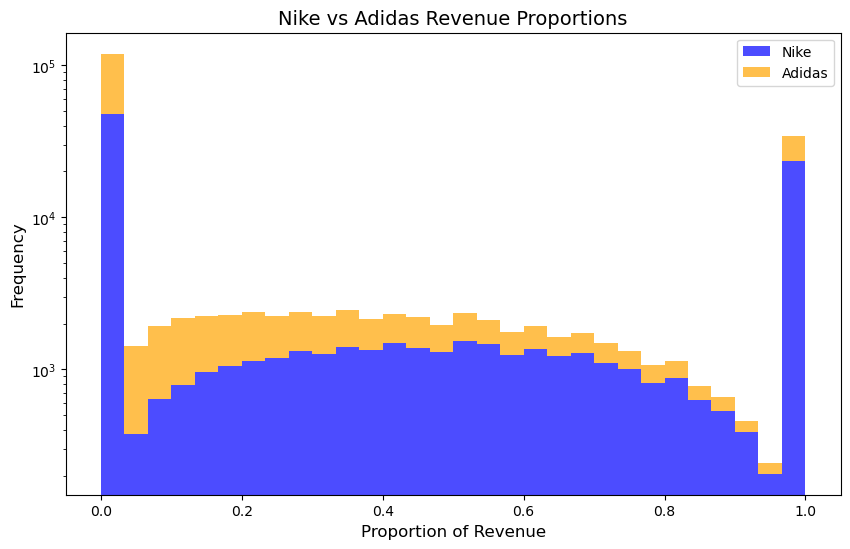

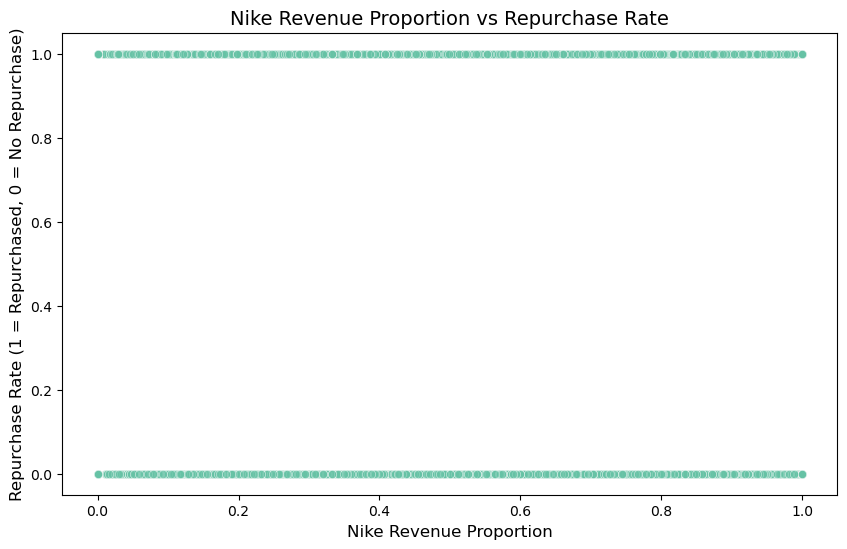

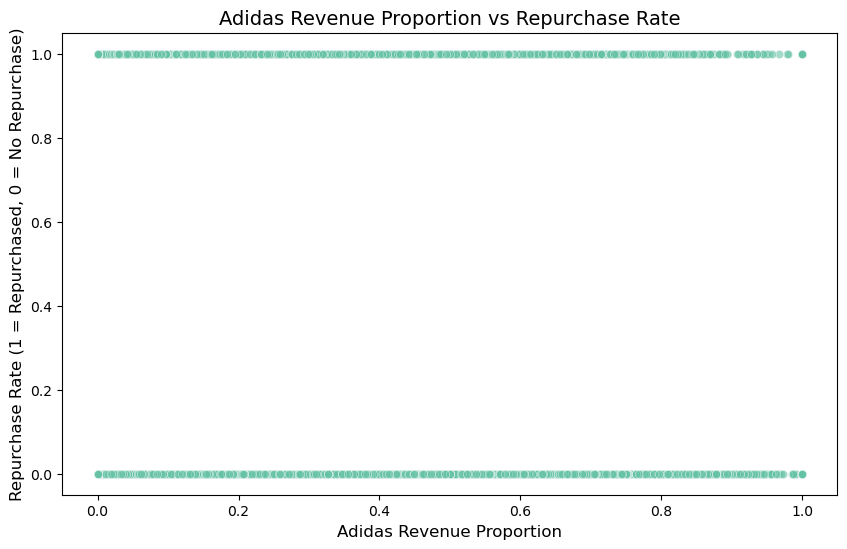

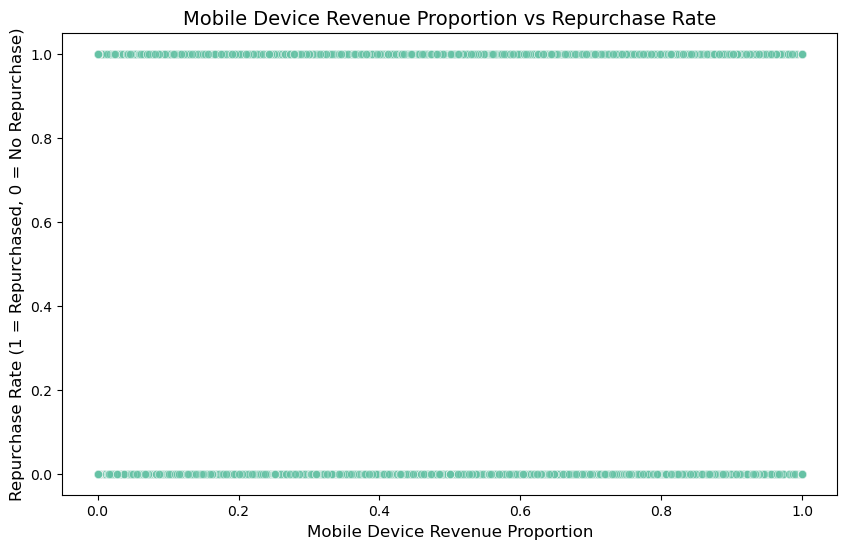

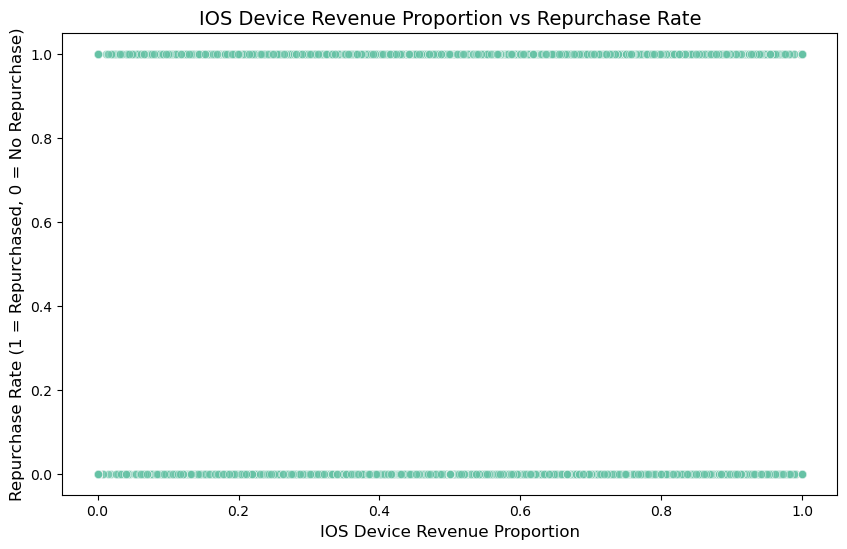

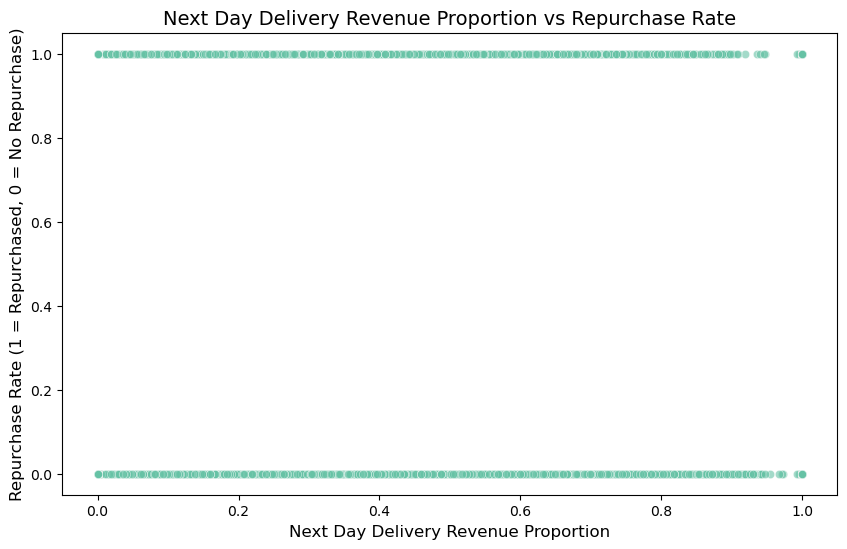

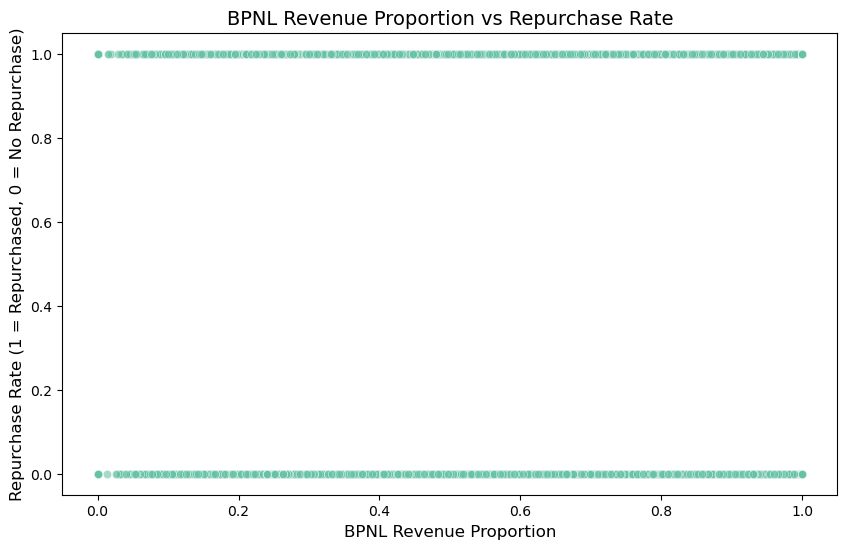

In [11]:
#### Next I want to explore brand loyalty (Nike vs. Adidas) and other devices to understand how revenue from these brands/devices 
#### relates to repurchase rates 

#### going in brand preferences analysis 
plt.figure(figsize=(10, 6))
# Plot histogram for both Nike and Adidas proportions, stacked
plt.hist([df['Brand_Nike_prop_revenue_1yr'], df['Brand_Adidas_prop_revenue_1yr']], 
         bins=30, stacked=True, label=['Nike', 'Adidas'], color=['blue', 'orange'], alpha=0.7)
plt.title('Nike vs Adidas Revenue Proportions', fontsize=14)
plt.xlabel('Proportion of Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')
plt.legend()
plt.show()

#mean_nike = df['Brand_Nike_prop_revenue_1yr'].mean()
#mean_adidas = df['Brand_Adidas_prop_revenue_1yr'].mean()
#print(f"Mean Nike Revenue Proportion: {mean_nike}")
#print(f"Mean Adidas Revenue Proportion: {mean_adidas}")


#### Nike Revenue vs. Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Brand_Nike_prop_revenue_1yr', y='repurchased', data=df, alpha=0.6)
plt.title('Nike Revenue Proportion vs Repurchase Rate', fontsize=14)
plt.xlabel('Nike Revenue Proportion', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()

#### Adidas Revenue Proportion Vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Brand_Adidas_prop_revenue_1yr', y='repurchased', data=df, alpha=0.6)
plt.title('Adidas Revenue Proportion vs Repurchase Rate', fontsize=14)
plt.xlabel('Adidas Revenue Proportion', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()

#### Mobile Device Revenue Proportion Vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Device_mobile_prop_revenue_1yr', y='repurchased', data=df, alpha=0.6)
plt.title('Mobile Device Revenue Proportion vs Repurchase Rate', fontsize=14)
plt.xlabel('Mobile Device Revenue Proportion', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()

#### IOS Device Revenue Proportion Vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Device_iosapp_prop_revenue_1yr', y='repurchased', data=df, alpha=0.6)
plt.title('IOS Device Revenue Proportion vs Repurchase Rate', fontsize=14)
plt.xlabel('IOS Device Revenue Proportion', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()


#### Next Day Delivery Revenue Proportion Vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_NextDay_prop_revenue_1yr', y='repurchased', data=df, alpha=0.6)
plt.title('Next Day Delivery Revenue Proportion vs Repurchase Rate', fontsize=14)
plt.xlabel('Next Day Delivery Revenue Proportion', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()


#### Repurchase Rate By whether the customer used bnpl ( buy now pay later) in the last 12 months
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Payment_bnpl_prop_revenue_1yr', y='repurchased', data=df, alpha=0.6)
plt.title('BPNL Revenue Proportion vs Repurchase Rate', fontsize=14)
plt.xlabel('BPNL Revenue Proportion', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()





# Insights from Brand Preference Analysis:
- #### Nike vs. Adidas Revenue Proportions:
  There are distinct customer segments with a clear preference for either Nike or Adidas, with some overlap. Customers appear more polarized towards one brand rather than splitting purchases evenly.
- #### Nike Revenue vs. Repurchase Rate:
  A higher proportion of revenue from Nike doesn't seem to strongly correlate with repurchase behavior. However, some higher-revenue customers tend to repurchase.
- #### Adidas Revenue vs. Repurchase Rate:
  Similar to Nike, there is no clear trend indicating that a higher Adidas revenue proportion drives repurchase behavior, but there are outliers showing higher repurchase activity.
- #### Device Revenue vs. Repurchase Rate:
  Similar to Nike/Adidas, there is no clear trend indicating that a higher ios/mobile/nextday delievery revenue proportion drives repurchase behavior.

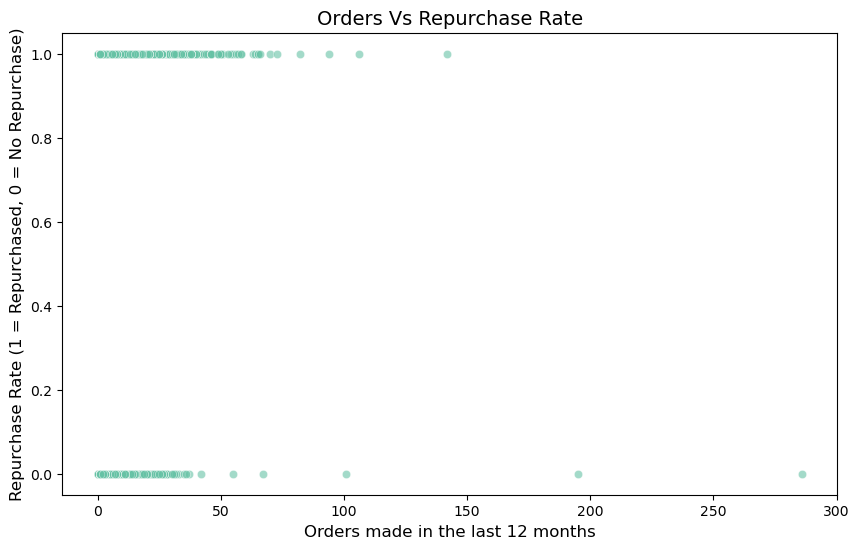

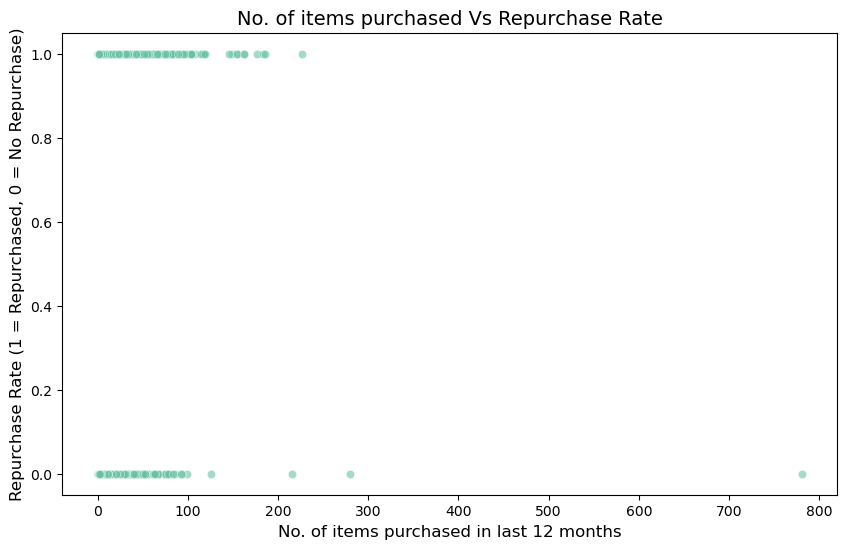

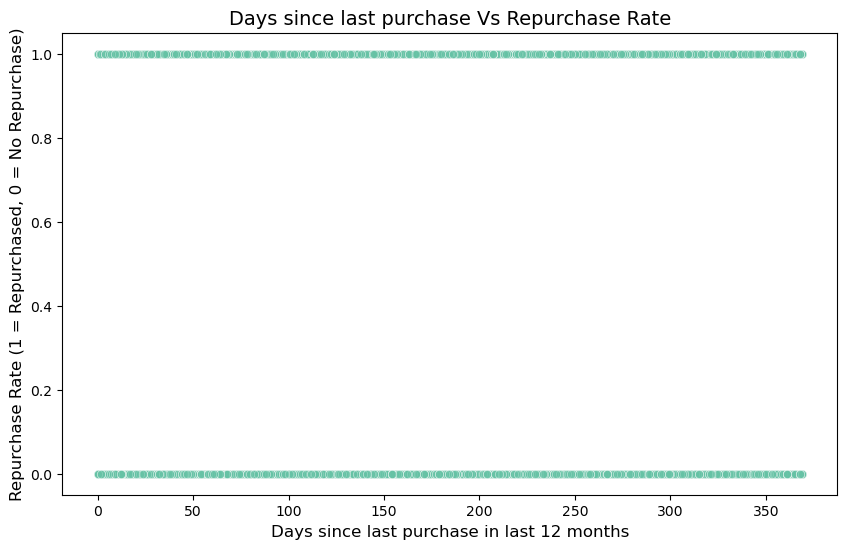

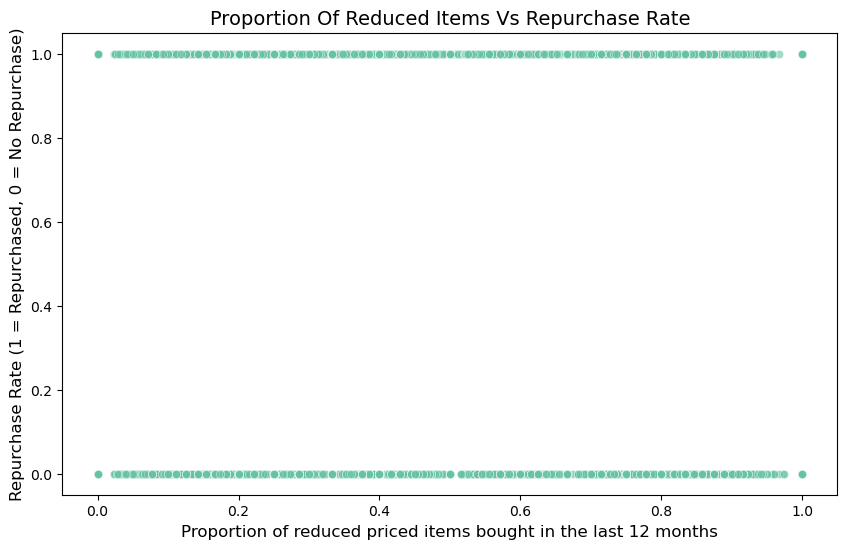

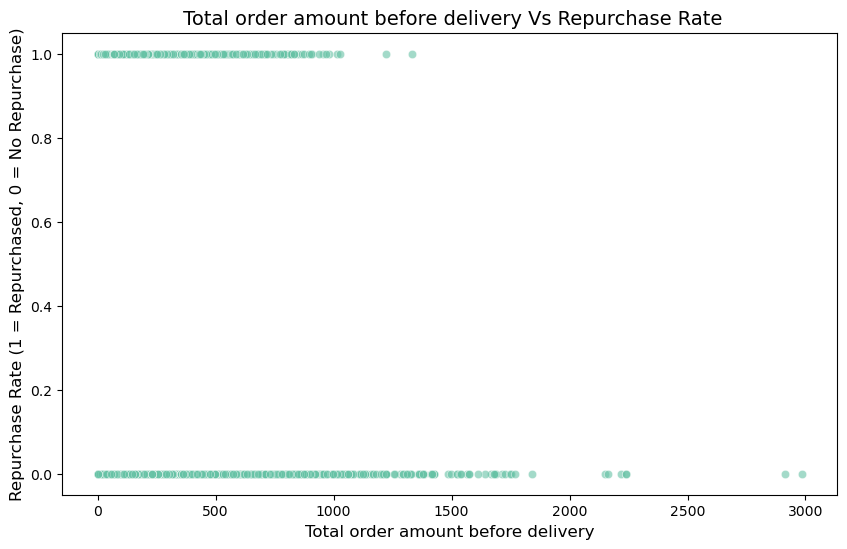

In [12]:
#### Exploring other variables and their impact on Repurchase rate

#### Orders made vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='orders_1yr', y='repurchased', data=dfc, alpha=0.6)
plt.title('Orders Vs Repurchase Rate', fontsize=14)
plt.xlabel('Orders made in the last 12 months', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()

#### No. of items purchased in last 12 months vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='line_items_1yr', y='repurchased', data=dfc, alpha=0.6)
plt.title('No. of items purchased Vs Repurchase Rate', fontsize=14)
plt.xlabel('No. of items purchased in last 12 months', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()

#### Days since last purchase inlast 12 months vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_since_last_purchase_1yr', y='repurchased', data=dfc, alpha=0.6)
plt.title('Days since last purchase Vs Repurchase Rate', fontsize=14)
plt.xlabel('Days since last purchase in last 12 months', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()


#### Proportion of Reduced Items vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prop_reduced_items_1yr', y='repurchased', data=dfc, alpha=0.6)
plt.title('Proportion Of Reduced Items Vs Repurchase Rate', fontsize=14)
plt.xlabel('Proportion of reduced priced items bought in the last 12 months', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()

#### Total order amount before delivery vs Repurchase Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount_paid_per_order_1yr', y='repurchased', data=dfc, alpha=0.6)
plt.title(' Total order amount before delivery Vs Repurchase Rate', fontsize=14)
plt.xlabel('Total order amount before delivery', fontsize=12)
plt.ylabel('Repurchase Rate (1 = Repurchased, 0 = No Repurchase)', fontsize=12)
plt.show()


- #### Seeing the relation of customor behaviour on Repurchase rate
  There doesn't appear to be any direct correlation here!
  

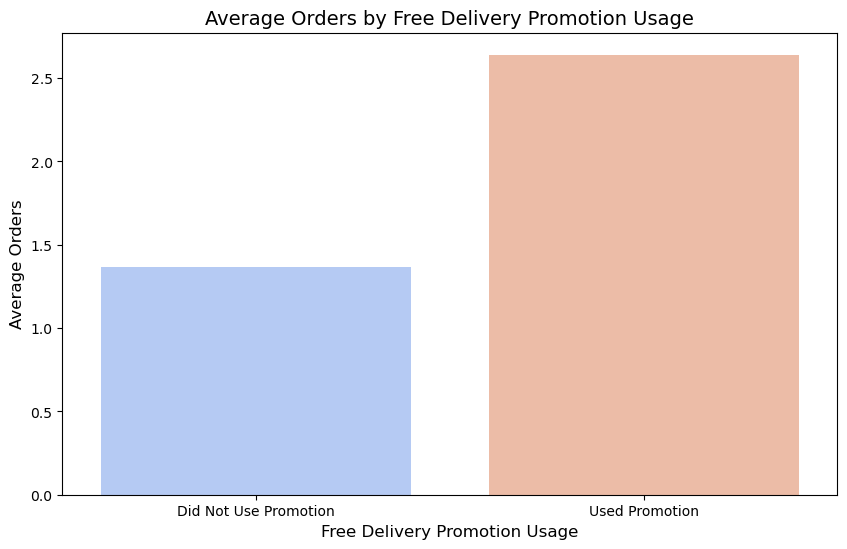

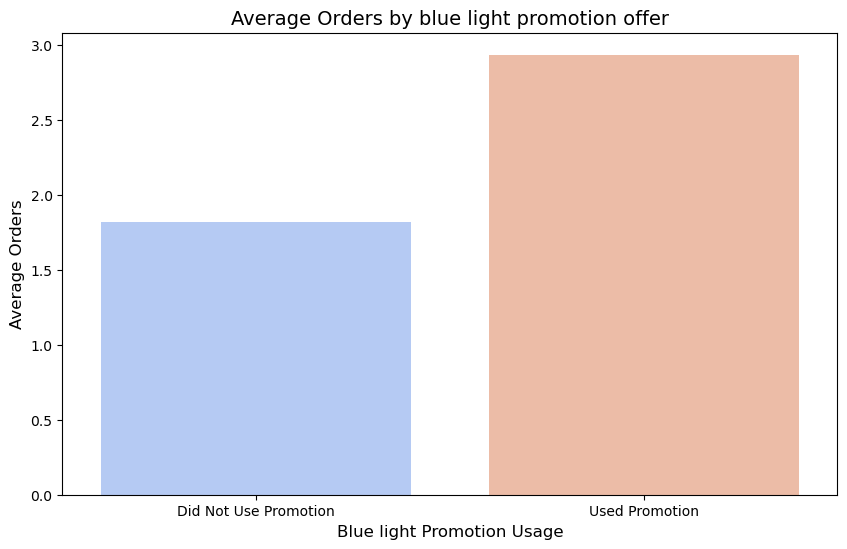

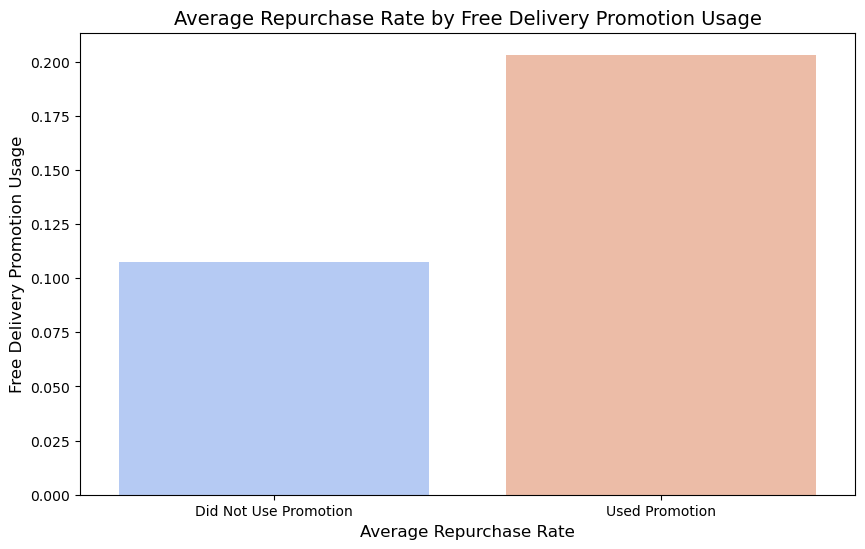

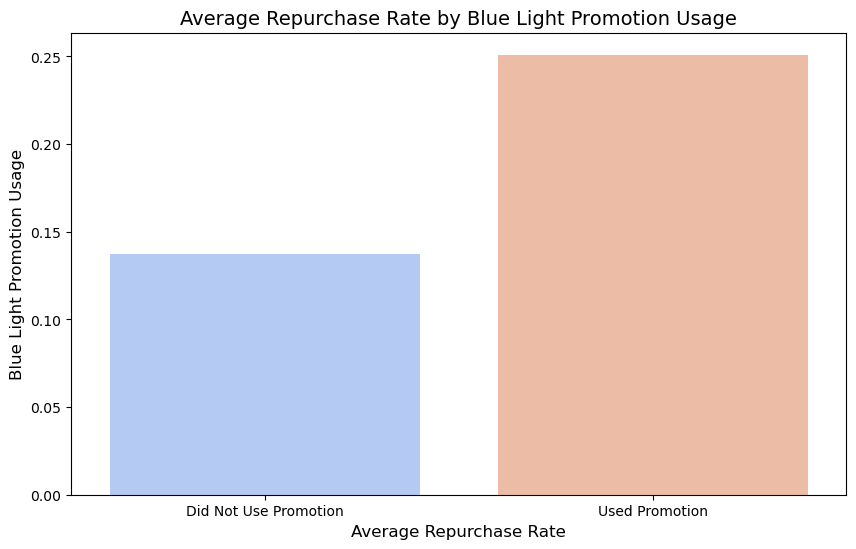

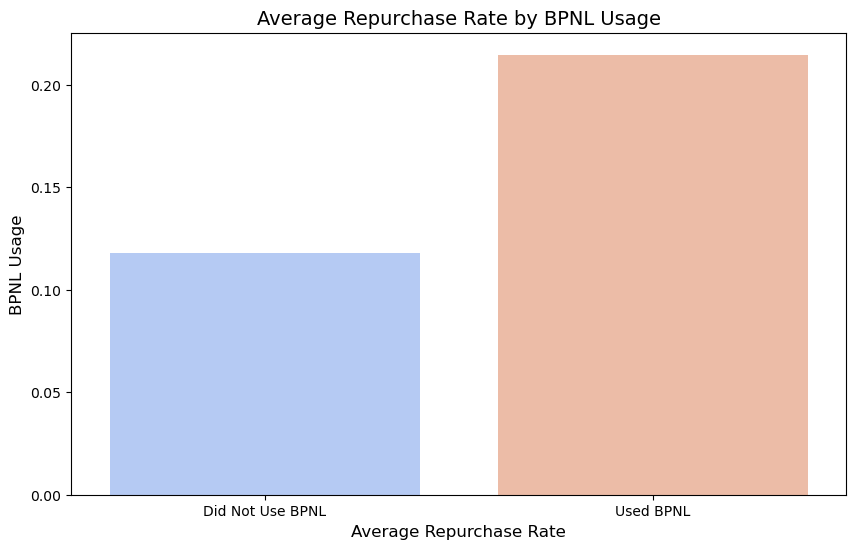

In [13]:
#### Next, I want to see if there is any Promotional Influence:
#### To do that, I investigate how using free delivery promotions influences order frequency and repurchase behavior.


#### Orders By Free Delivery Promotion Usage
promo_orders = dfc.groupby('promo_customer_freedelivery_1yr')['orders_1yr'].mean().reset_index()
promo_orders['promo_customer_freedelivery_1yr'] = promo_orders['promo_customer_freedelivery_1yr'].map({1: 'Used Promotion', 0: 'Did Not Use Promotion'})
plt.figure(figsize=(10, 6))
sns.barplot(x='promo_customer_freedelivery_1yr', y='orders_1yr', data=promo_orders, palette='coolwarm')
plt.title('Average Orders by Free Delivery Promotion Usage', fontsize=14)
plt.xlabel('Free Delivery Promotion Usage', fontsize=12)
plt.ylabel('Average Orders', fontsize=12)
plt.show()

#### Orders By blue light promotion offer 
promo_orders = dfc.groupby('promo_customer_blc_1yr')['orders_1yr'].mean().reset_index()
promo_orders['promo_customer_blc_1yr'] = promo_orders['promo_customer_blc_1yr'].map({1: 'Used Promotion', 0: 'Did Not Use Promotion'})
plt.figure(figsize=(10, 6))
sns.barplot(x='promo_customer_blc_1yr', y='orders_1yr', data=promo_orders, palette='coolwarm')
plt.title('Average Orders by blue light promotion offer', fontsize=14)
plt.xlabel('Blue light Promotion Usage', fontsize=12)
plt.ylabel('Average Orders', fontsize=12)
plt.show()

#### Repurchase Rate by Free Delivery Promotion
promo_repurchased = dfc.groupby('promo_customer_freedelivery_1yr')['repurchased'].mean().reset_index()
promo_repurchased['promo_customer_freedelivery_1yr'] = promo_repurchased['promo_customer_freedelivery_1yr'].map({1: 'Used Promotion', 0: 'Did Not Use Promotion'})
plt.figure(figsize=(10, 6))
sns.barplot(x='promo_customer_freedelivery_1yr', y='repurchased', data=promo_repurchased, palette='coolwarm')
plt.title('Average Repurchase Rate by Free Delivery Promotion Usage', fontsize=14)
plt.xlabel('Average Repurchase Rate', fontsize=12)
plt.ylabel('Free Delivery Promotion Usage', fontsize=12)
plt.show()

#### Repurchase Rate By blue light promotion offer
promo_repurchased = dfc.groupby('promo_customer_blc_1yr')['repurchased'].mean().reset_index()
promo_repurchased['promo_customer_blc_1yr'] = promo_repurchased['promo_customer_blc_1yr'].map({1: 'Used Promotion', 0: 'Did Not Use Promotion'})
plt.figure(figsize=(10, 6))
sns.barplot(x='promo_customer_blc_1yr', y='repurchased', data=promo_repurchased, palette='coolwarm')
plt.title('Average Repurchase Rate by Blue Light Promotion Usage', fontsize=14)
plt.xlabel('Average Repurchase Rate', fontsize=12)
plt.ylabel('Blue Light Promotion Usage', fontsize=12)
plt.show()

#### Repurchase Rate By whether the customer used bnpl ( buy now pay later) in the last 12 months
bpnl_repurchased = dfc.groupby('Payment_bnpl_prop_revenue_1yr')['repurchased'].mean().reset_index()
bpnl_repurchased['Payment_bnpl_prop_revenue_1yr'] = bpnl_repurchased['Payment_bnpl_prop_revenue_1yr'].map({1: 'Used BPNL', 0: 'Did Not Use BPNL'})
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment_bnpl_prop_revenue_1yr', y='repurchased', data=bpnl_repurchased, palette='coolwarm')
plt.title('Average Repurchase Rate by BPNL Usage', fontsize=14)
plt.xlabel('Average Repurchase Rate', fontsize=12)
plt.ylabel('BPNL Usage', fontsize=12)
plt.show()



# Insights from Promotional Influence Analysis:
- #### Orders and Free Delivery Promotion:
    Customers who used the free delivery promotion tend to place more orders on average compared to those who did not.
- #### Orders and Blue Light Promotion:
    Similarly, customers who utilized Blue Light Promotion tend to have more orders than those who didn't.
- #### Repurchase Rate and Free Delivery Promotion:
    The repurchase rate is slightly higher for customers who used the free delivery promotion compared to those who did not, suggesting a modest positive influence on repeat purchases.
- #### Repurchase Rate and Blue Light Promotion:
    Similarly, the repurchase rate is slightly higher for customers who used the Blue light promotion compared to those who did not, suggesting a modest positive influence on repeat purchases.

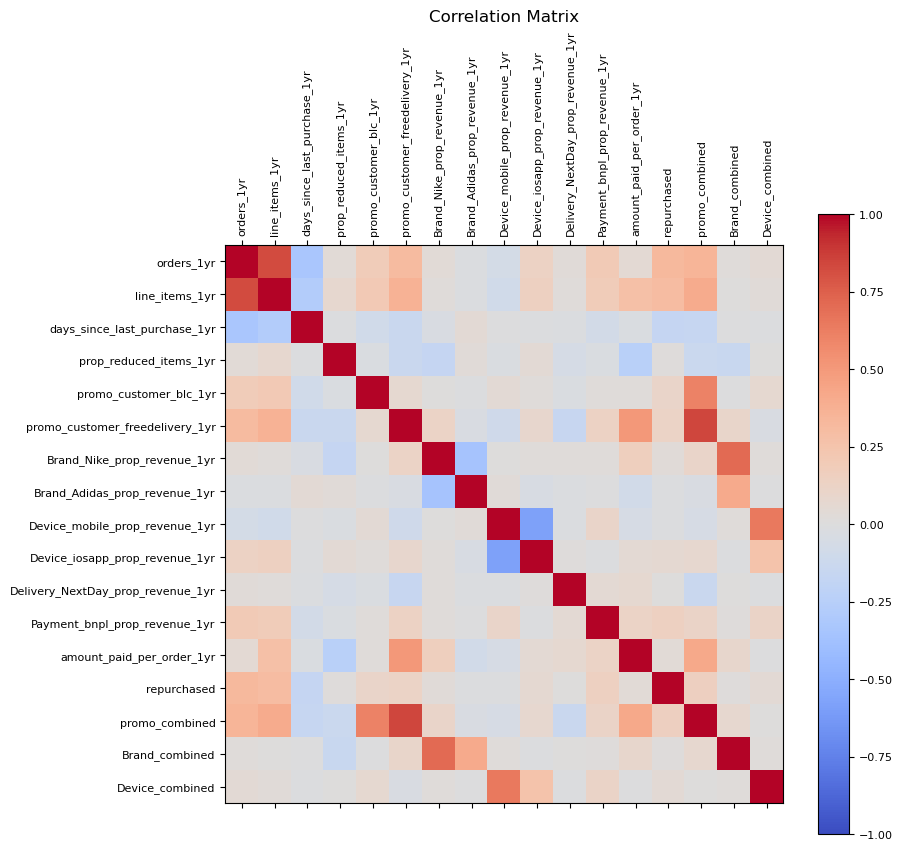

In [23]:
#### Now, I want to perform a correlation analysis to see how variables like the amount paid, number of orders, and promotional activity relate to each other and repurchase behavior.
# Correlation 
def plot_correlation(df,variables=None):
    f = plt.figure(figsize=(9, 8))
    if variables is not None:
        df = df[variables]
    #sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)    
    plt.matshow(df.corr(), fignum=f.number, cmap='coolwarm', vmin=-1, vmax=+1)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=8, rotation=90)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=8)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=8)
    plt.title('Correlation Matrix', fontsize=12)
    plt.savefig("CorrelationMatrix.png")
    plt.show()


plot_correlation(dfc.select_dtypes(include=['int64', 'float64']))

#key_variables = dfc[['orders_1yr', 'Brand_Nike_prop_revenue_1yr', 'Brand_Adidas_prop_revenue_1yr',
#                    'promo_customer_freedelivery_1yr', 'promo_customer_blc_1yr', 'repurchased']]
# Compute the correlation matrix
#correlation_matrix = key_variables.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
#plt.figure(figsize=(10, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Correlation Matrix of Key Variables', fontsize=14)
#plt.show()


# Insights from Correlation Analysis:
- #### Orders and Line Items:
    There is a strong positive correlation between the number of orders and the number of line items, indicating that customers who place more orders tend to purchase more items.
- #### Days since last purchase Vs Orders/Line Items
  There is a negative correlation between Days since last purchase and number of orders placed or line items??
  #### Think how to explain  
- #### Brands and Devices:
    The correlation between brand usage (nike/adidas) is negative as one would expect, suggesting people who have a favourite brand say nike/they dont tend to spend on adidas and so forth. Simlarly, its true between Device revenue proportions of mobiles and ios app.
- #### Promotions and Orders:
    The correlation between promotional usage (promo_customer_freedelivery_1yr, promo_customer_blc_1yr) and orders is positive, suggesting that promotions encourage higher purchasing activity.  
- #### Repurchase Rate:
    The repurchase rate has a weak correlation with most variables, indicating that factors like promotional use or the amount paid per order may not strongly predict repeat purchases.

In [15]:
#### Now I would finally like to perform the predictive modelling of repurchase rate.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [16]:
from scipy import stats
dfc = df.drop(columns=['customer_site_id','Current_RFM_Segment','ONS_Segment']).dropna()

#### Removing outliers
dfc = dfc[(np.abs(stats.zscore(dfc)) < 5).all(axis=1)]
target = dfc['repurchased']


def make_XY(variables):
    assert isinstance(variables, list)
    df_cut = dfc[variables]
    
    # Splitting the data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(df_cut, target, test_size=0.2, random_state=0, shuffle=True, stratify=target)
    return X_train, X_test, y_train, y_test


#### combining the corelated variables (or so called feature engineering) to avoid multicolinearity 
#### while classification model try to train on the data.
#### Decided to do the simple submission and not multiplication as they are most -ve corelated.
dfc['promo_combined']= dfc['promo_customer_freedelivery_1yr']+dfc['promo_customer_blc_1yr']
dfc['Brand_combined']= dfc['Brand_Adidas_prop_revenue_1yr']+dfc['Brand_Nike_prop_revenue_1yr']
dfc['Device_combined'] = dfc['Device_mobile_prop_revenue_1yr']+dfc['Device_iosapp_prop_revenue_1yr']

input_vars = ['orders_1yr','promo_combined', 'Brand_combined','Device_combined','Payment_bnpl_prop_revenue_1yr']
X_train, X_test, y_train, y_test = make_XY(input_vars)


In [17]:
#### Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Class balancing
from sklearn.utils import class_weight
# Compute class weights
unique_classes = np.unique(y_train)
print(f"Unique Classes in y_train: {unique_classes}")

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print(f"Class Weights Dictionary: {class_weights_dict}")

Unique Classes in y_train: [0 1]
Class Weights Dictionary: {0: 0.587234605657825, 1: 3.3658351592786113}


In [18]:
#### Train the logistic model
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, class_weight=class_weights_dict)
#logreg = LogisticRegression(max_iter=1000)
# Train the model on the training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 0.587234605657825, 1: 3.3658351592786113},
                   max_iter=1000)

(19970, 5)


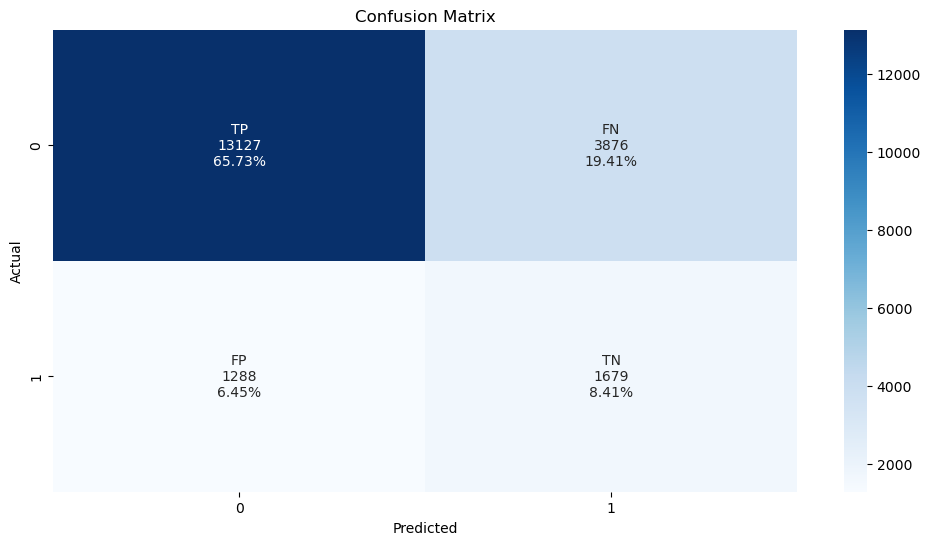

Total Accuracy: 0.74
In a test sample of size 19970
This Model will send total emails : 5555
Where Estimated misclassification cost (in Pounds) is : 7752.00
                               Coefficient
orders_1yr                        0.662523
promo_combined                    0.131058
Brand_combined                    0.020959
Device_combined                   0.104054
Payment_bnpl_prop_revenue_1yr     0.219925


In [19]:
#### Evaluate the model
# Make predictions on the test set
print(X_test_scaled.shape)
y_pred = logreg.predict(X_test_scaled)


# Display a confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#print(f"Confusion Matrix:\n{cf_matrix}")

plt.figure(figsize=(12,6))
group_names = ['TP','FN','FP','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
#print(f"Confusion Matrix:\n{conf_matrix_normalized}")
#sns.heatmap(conf_matrix_normalized , annot=True,   fmt='g', cmap='YlGnBu', linewidths=0.5, vmin=np.min(conf_matrix_normalized), vmax=np.max(conf_matrix_normalized))

plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 0: when customer doesnt repurchase, 1 : when customer repurchases 
## TP : "when customer doesn't make a purchase and has been predicted so (0,0)"
## FN : "when customer actually made no purchase but model predicted he did (0,1)"
## FP : "when customer actually made a purchase but model predicted he didn't (1,0)"
## TN :  "when customer actually made a purchase but model predicted he did (1,1)"

# Extract values from the confusion matrix
TP, FN, FP, TN = cf_matrix.ravel()
#print("TP: ", TP, " FN: ", FN, "\nFP: ", FP, " TN: ",TN)

#### Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Total Accuracy: {accuracy:.2f}")


#### Calculate Misclassification Rate
#misclassification_rate = (FP + FN) / (TP + TN + FP + FN)
#print(f"Total Misclassification Rate: {misclassification_rate:.2f}")

print("In a test sample of size", len(y_test))
#### The customers that this model will send emails to is where model predicts 1, which will be total of FN and TN.
print(f"This Model will send total emails : {(FN+TN):d}") 

#### Calculate Misclassification Cost sent per email 
#### To look at this, we need to know how many times my model predicted that customer would repurchase but in reality he wont (This is FN)
CostPerEmail = 2 
misclassification_cost = (FN) * CostPerEmail
print(f"Where Estimated misclassification cost (in Pounds) is : {misclassification_cost:.2f}")

#### Calculate FP Rate
#False_Positive_rate = (FP)/ (TN + FP)
#print(f"FPR : {False_Positive_rate:.2f}")

#### Calculate TP Rate/Recall (Of all the actual positives, how many did the model correctly identify?")
#True_Positive_rate = (TP)/ (TP + FN)
#print(f"TPR/Recall : {True_Positive_rate:.2f}")


#### Precision :  "When the model predicts positive, how often is it corr" OR How many of the predicted positives were actually correct?
#Precision = TP/(TP+FP)
#print(f"Precision : {Precision:.2f}")

#### F1-score: harmonic mean of precision and recall (A balanced measure of precision and recall. Useful when you need a balance between the two.)
#F1_score = 2*Precision*True_Positive_rate/(Precision+True_Positive_rate)
#print(f"F1 Score : {F1_score:.2f}")


coefficients = pd.DataFrame(logreg.coef_.T, index=input_vars, columns=['Coefficient'])
print(coefficients)



# Key Insights from Logestic Regresssion modelling
- Accuracy is 74%. I started by 64% of accuracy initially, improved it to 74% by  :
    - Making sure there is no class imbalance
    - There are no outliers beyond 5 sigma (for simplicity, ofcourse one just can't decide the remove them blindly!), but wanted to make sure to have a working model first.
    - No categorical inputs are provided (One Hot encoding is kept for later)
    - Making sure the input featured are scaled using standard scaler to ensure that features are on the same scale.
    - Did basic feature engineering:
       - By hit and trial while training, noticed which variables are important, removed variables which had very low coefficients and hence were not important.
       - To deal with corelated variables provided their sum as input - again to keep things simple.
- MissClssification cost comes out to be 7752.00 pounds
        
- Confusion matrix has a lot of mis-classification, in principle one could target to improve this further using more sophisticated feature engineering/adding regularization/looking for over-fitting.
- Therefore tried GridSearchCV algorithm next.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.pena

Best Hyperparameters: {'logreg__C': 0.1, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best cross-validated accuracy: 0.74


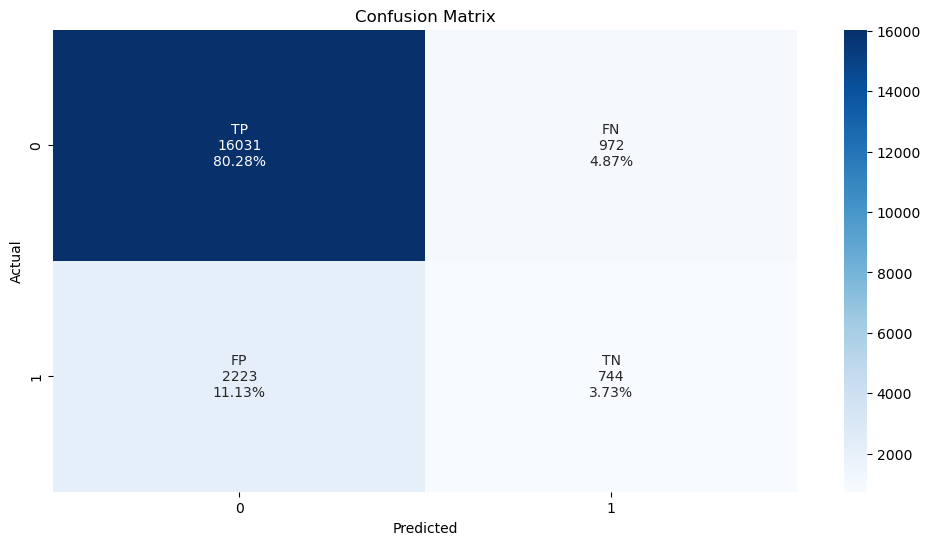

Total Accuracy: 0.84
In a test sample of size 19970
This Model will send total emails : 1716
Where Estimated misclassification cost (in Pounds) is : 1944.00


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#### Define a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('logreg', LogisticRegression())  # Logistic regression model
])

#### Define the hyperparameters grid to search
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
    'logreg__penalty': ['l1', 'l2'],  # Regularization techniques
    'logreg__class_weight': ['balanced']  # Handle class imbalance by weighting classes inversely proportional to frequency
}

#### Initialize GridSearchCV with class weights and 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

#### Fit the model using grid search on the training data
grid_search.fit(X_train, y_train)

#### Print the best hyperparameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.2f}")


#### Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

#### Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)


# Display a confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#print(f"Confusion Matrix:\n{cf_matrix}")

plt.figure(figsize=(12,6))
group_names = ['TP','FN','FP','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
#print(f"Confusion Matrix:\n{conf_matrix_normalized}")
#sns.heatmap(conf_matrix_normalized , annot=True,   fmt='g', cmap='YlGnBu', linewidths=0.5, vmin=np.min(conf_matrix_normalized), vmax=np.max(conf_matrix_normalized))

plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 0: when customer doesnt repurchase, 1 : when customer repurchases 
## TP : "when customer doesn't make a purchase and has been predicted so (0,0)"
## FN : "when customer actually made no purchase but model predicted he did (0,1)"
## FP : "when customer actually made a purchase but model predicted he didn't (1,0)"
## TN :  "when customer actually made a purchase but model predicted he did (1,1)"

# Extract values from the confusion matrix
TP, FN, FP, TN = cf_matrix.ravel()
#print("TP: ", TP, " FN: ", FN, "\nFP: ", FP, " TN: ",TN)

#### Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Total Accuracy: {accuracy:.2f}")


#### Calculate Misclassification Rate
#misclassification_rate = (FP + FN) / (TP + TN + FP + FN)
#print(f"Total Misclassification Rate: {misclassification_rate:.2f}")

print("In a test sample of size", len(y_test))
#### The customers that this model will send emails to is where model predicts 1, which will be total of FN and TN.
print(f"This Model will send total emails : {(FN+TN):d}") 

#### Calculate Misclassification Cost sent per email 
#### To look at this, we need to know how many times my model predicted that customer would repurchase but in reality he wont (This is FN)
CostPerEmail = 2 
misclassification_cost = (FN) * CostPerEmail
print(f"Where Estimated misclassification cost (in Pounds) is : {misclassification_cost:.2f}")

#### Calculate FP Rate
#False_Positive_rate = (FP)/ (TN + FP)
#print(f"FPR : {False_Positive_rate:.2f}")

#### Calculate TP Rate/Recall (Of all the actual positives, how many did the model correctly identify?")
#True_Positive_rate = (TP)/ (TP + FN)
#print(f"TPR/Recall : {True_Positive_rate:.2f}")


#### Precision :  "When the model predicts positive, how often is it corr" OR How many of the predicted positives were actually correct?
#Precision = TP/(TP+FP)
#print(f"Precision : {Precision:.2f}")

#### F1-score: harmonic mean of precision and recall (A balanced measure of precision and recall. Useful when you need a balance between the two.)
#F1_score = 2*Precision*True_Positive_rate/(Precision+True_Positive_rate)
#print(f"F1 Score : {F1_score:.2f}")


# Key Insights from Logestic Regresssion modelling
- Accuracy is 84% with grid search algorithm but fit has a warning of failing.        
- Confusion matrix is also better. 
- Added regularization in grid-search but don't have much experience on how to check/control overfitting in Logestic regression Modelling. Even though better results but need understanding of fit fail and thus not confident in providing these numbers. 
- Therfore at this point, feeling unsatisfied from Logestic Regresssion modelling trial given my lack of knowledge (and given the deadline). I decided of shifting to DNN binary classification where I have more experience from past to tune the model with hyper-parameter tuning and more control over how to look for any bias with overfitting.
- Also, decided to take this DNN modelling to another notebook! :)
  